<a href="https://colab.research.google.com/github/EyyupArslan/kNN_algorithm/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd

# open zip file
with zipfile.ZipFile("wine.zip", 'r') as zip_ref:
    zip_ref.extractall("wine_data")

# read data
data_path = "wine_data/wine.data"


In [ ]:
columns = [
    "Class label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

df = pd.read_csv(data_path, header=None, names=columns)
df.head()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


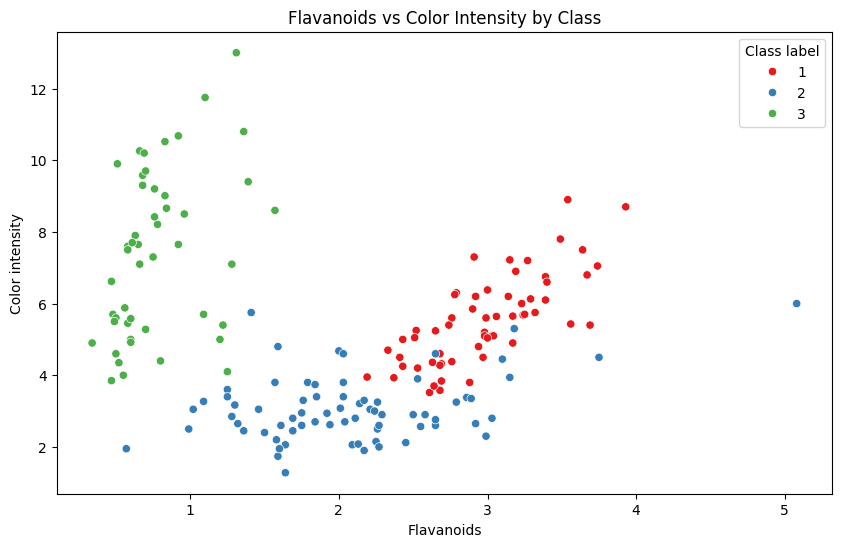

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show class difference between two attributes with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Flavanoids", y="Color intensity", hue="Class label", palette="Set1")
plt.title("Flavanoids vs Color Intensity by Class")
plt.show()


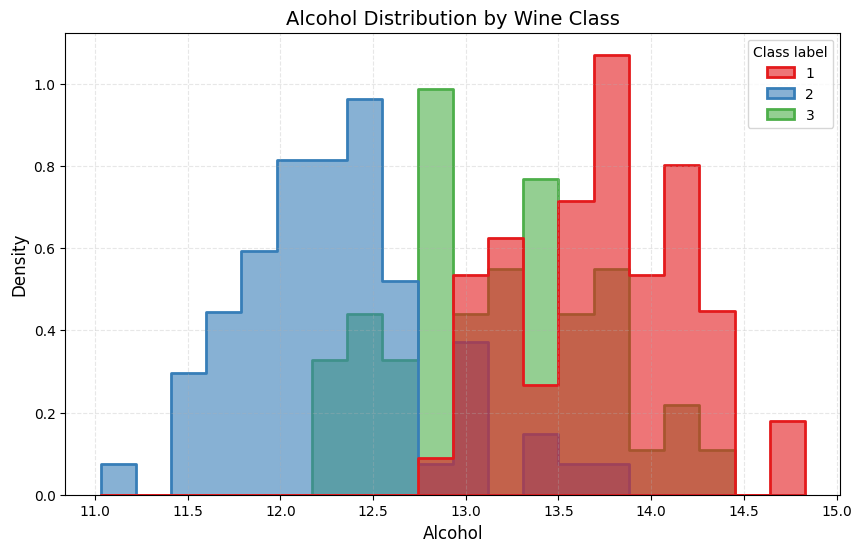

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Alcohol",
    hue="Class label",
    bins=20,
    element="step",
    stat="density",
    common_norm=False,
    palette="Set1",
    alpha=0.6,
    linewidth=2
)
plt.title("Alcohol Distribution by Wine Class", fontsize=14)
plt.xlabel("Alcohol", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


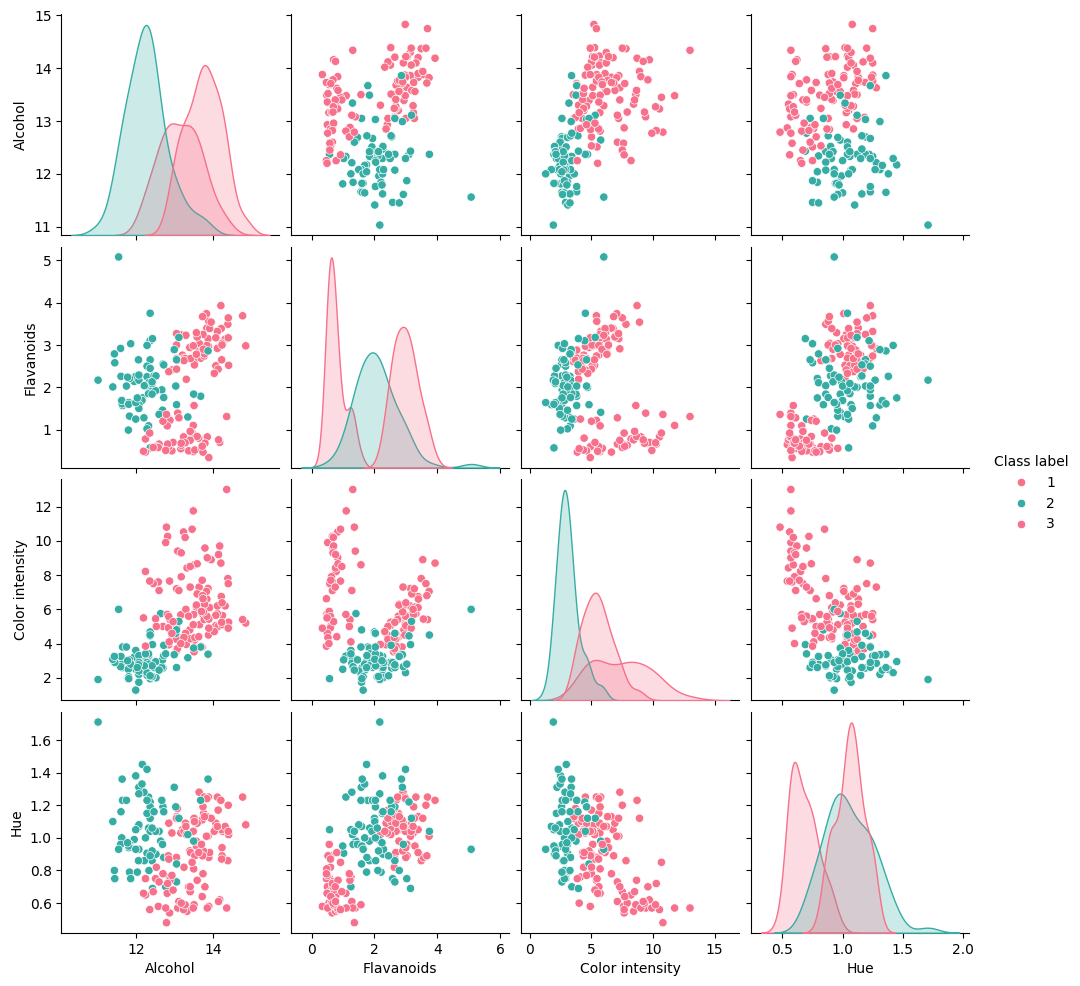

In [ ]:
selected_features = ["Alcohol", "Flavanoids", "Color intensity", "Hue", "Class label"]
sns.pairplot(df[selected_features], hue="Class label", palette="husl")
plt.show()


In [ ]:
# Let's check if there is any missing data
df.isnull().sum()

,0
Class label,0
Alcohol,0
Malic acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate properties and labels
X = df.drop("Class label", axis=1)
y = df["Class label"]

# Separate into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizasyon (z-score normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


In [ ]:
from collections import Counter

def knn_predict(X_train, y_train, X_test, k, distance_metric):
    predictions = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            if distance_metric == 'euclidean':
                dist = euclidean_distance(test_point, train_point)
            elif distance_metric == 'manhattan':
                dist = manhattan_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        # Take the smallest distance k
        distances.sort(key=lambda x: x[0])
        k_nearest = [label for _, label in distances[:k]]
        # Give an estimate of the most common class
        most_common = Counter(k_nearest).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions


In [ ]:
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan']
results = {}

for metric in metrics:
    results[metric] = []
    for k in k_values:
        y_pred = knn_predict(X_train_scaled, y_train.values, X_test_scaled, k, metric)
        acc = accuracy_score(y_test, y_pred)
        results[metric].append(acc)


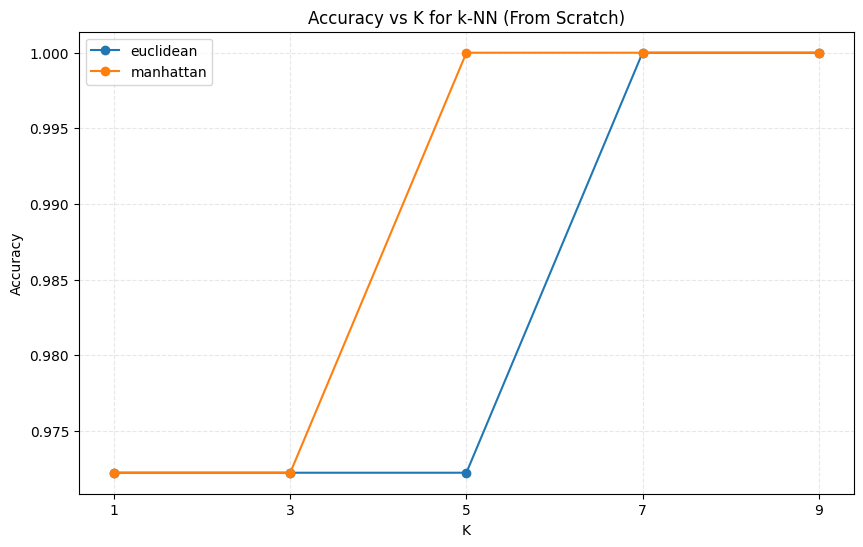

In [ ]:
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_values, results[metric], marker='o', label=metric)
plt.title("Accuracy vs K for k-NN (From Scratch)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Find the combination that works best
best_metric = max(results, key=lambda m: max(results[m]))
best_k_index = np.argmax(results[best_metric])
best_k = k_values[best_k_index]

# Guess again
y_pred_best = knn_predict(X_train_scaled, y_train.values, X_test_scaled, best_k, best_metric)

# Confusion Matrix
print(f"🔍 Best metric: {best_metric} | Best K: {best_k}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


🔍 Best metric: euclidean | Best K: 7

Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



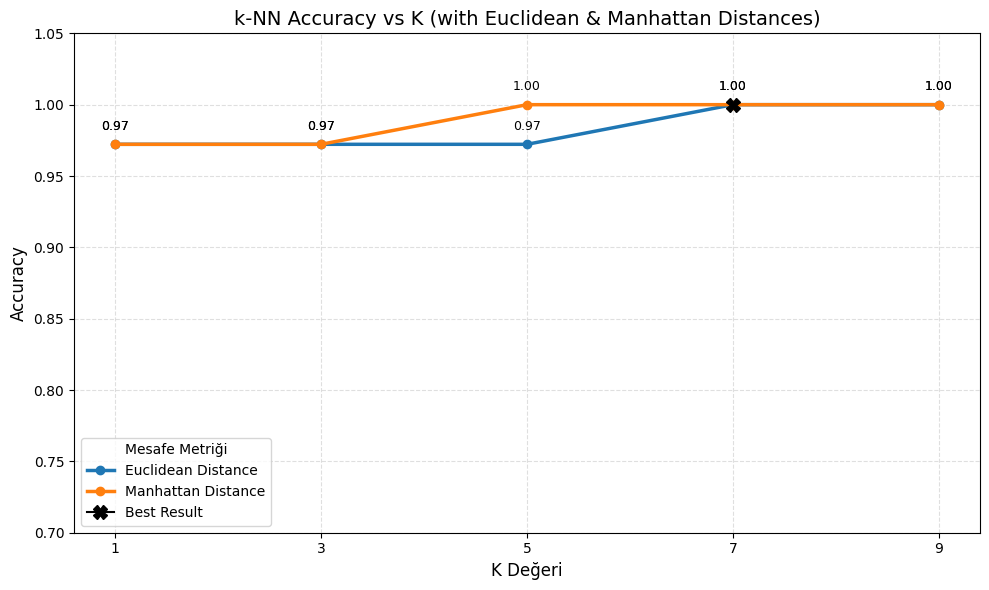

In [ ]:
plt.figure(figsize=(10, 6))

for metric in metrics:
    accuracies = results[metric]
    plt.plot(k_values, accuracies, marker='o', linewidth=2.5, label=f"{metric.title()} Distance")

    # Write the value above each point
    for i, acc in enumerate(accuracies):
        plt.text(k_values[i], acc + 0.01, f"{acc:.2f}", ha='center', fontsize=9)

# Find and mark the highest accuracy
best_metric = max(results, key=lambda m: max(results[m]))
best_k_idx = np.argmax(results[best_metric])
best_k_val = k_values[best_k_idx]
best_acc = results[best_metric][best_k_idx]

plt.plot(best_k_val, best_acc, marker='X', color='black', markersize=10, label='Best Result')

plt.title("k-NN Accuracy vs K (with Euclidean & Manhattan Distances)", fontsize=14)
plt.xlabel("K Değeri", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(k_values)
plt.ylim(0.7, 1.05)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Mesafe Metriği", fontsize=10)
plt.tight_layout()
plt.show()
